In [1]:
import numpy as np  # モジュールnumpyを読み込み
import matplotlib.pyplot as plt  # モジュールmatplotlibのpylab関数を読み込み
from mpl_toolkits.mplot3d import Axes3D  # matplotlibのAxes3Dを読み込み
%matplotlib inline

In [2]:
def bernstein(t, n, i):  # bernstein基底関数の定義
    cn, ci, cni = 1.0, 1.0, 1.0
    for k in range(2, n, 1):
        cn = cn * k
    for k in range(1, i, 1):
        if i == 1:
            break
        ci = ci * k
    for k in range(1, n - i + 1, 1):
        if n == i:
            break
        cni = cni * k
    j = t**(i - 1) * (1 - t)**(n - i) * cn / (ci * cni)
    return j

In [3]:
def bezierplot(n, m, u, v, cp):  # bezier曲面の定義
    xyz = np.zeros([len(u), len(v), 3])
    for k in range(len(u)):
        for l in range(len(v)):
            for i in range(n):
                bu = bernstein(u[k], n, i + 1)
                for j in range(m):
                    bv = bernstein(v[l], m, j + 1)
                    xyz[k, l, :] += cp[i, j, :] * bu * bv
    return xyz

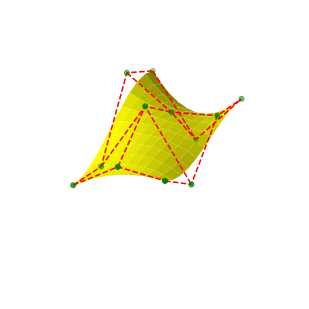

In [4]:
u, v = np.arange(0, 1 + 0.1, 0.1), np.arange(0, 1 + 0.1, 0.1)  # パラメータ生成
n, m = 4, 3  # u,v各方向の制御点数
cp = np.array([
    [[-1, -1.5, -0.3], [0, -1.5, 0.4], [1, -1.5, 0.4]],
    [[-1, -0.5, -0.4], [0, -0.5, 1.2], [1, -0.5, -0.2]],
    [[-1, 0.5, 1.2], [0, 0.5, 0.6], [1, 0.5, 0.8]],
    [[-1, 1.5, 0.8], [0, 1.5, -0.5], [1, 1.5, 0.7]]
])  # 制御点生成
s = bezierplot(n, m, u, v, cp)  # bezier曲面生成
fig = plt.figure()
ax = Axes3D(fig)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_xlim(-np.max(cp), np.max(cp))
ax.set_ylim(-np.max(cp), np.max(cp))
ax.set_zlim(-np.max(cp), np.max(cp))
ax.plot_surface(s[:, :, 0], s[:, :, 1], s[:, :, 2], rstride=1,
                cstride=1, color='yellow')  # bezier曲面の描画
ax.plot_wireframe(cp[:, :, 0], cp[:, :, 1], cp[:, :, 2],
                  color='red', linestyle='dashed')  # 制御多面体描画
ax.scatter3D(cp[:, :, 0], cp[:, :, 1], cp[:, :, 2], c='green', s=25)  # 制御点の描画
plt.show()